In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
exports_csv = "final_clean_exports.csv"
imports_csv = "final_clean_imports.csv"
exports_df = pd.read_csv(exports_csv)
imports_df = pd.read_csv(imports_csv)

In [100]:
exports_df["Commodity"].value_counts()

Chicken    29623
Pork       24134
Beef       16196
Turkey      8338
Sheep       2682
Goat         112
Name: Commodity, dtype: int64

In [101]:
imports_df["Commodity"].value_counts()

Beef       7893
Pork       7772
Sheep      4342
Chicken    2197
Other       439
Goat          4
Name: Commodity, dtype: int64

In [102]:
chicken_exports = exports_df.loc[(exports_df["Commodity"]=="Chicken")]
beef_exports = exports_df.loc[(exports_df["Commodity"]=="Beef")]
pork_exports = exports_df.loc[(exports_df["Commodity"]=="Pork")]

In [103]:
summary_chicken_exports = chicken_exports.groupby(["Country","Year"]).sum().reset_index()
summary_chicken_exports

,Country,Year,Unnamed: 0,Unnamed: 0.1,AMOUNT,Metric Tons
0,Argentina,2006,91784,4352371,1.885215e+05,5941.725297
1,Argentina,2007,61310,3015057,6.601521e+04,2080.634071
2,Argentina,2008,122863,6118481,6.859173e+04,2161.839401
3,Argentina,2009,61508,3236537,2.221124e+05,7000.424633
4,Argentina,2010,493517,17690181,2.032217e+06,40191.830504
...,...,...,...,...,...,...
184,United Kingdom,2013,47637546,57283366,1.625673e+07,21730.941103
185,United Kingdom,2014,47168789,60613006,2.349701e+07,27613.275016
186,United Kingdom,2015,55549815,74394635,2.801139e+07,182495.685049
187,United Kingdom,2016,51645974,64620640,1.541910e+07,76918.226589


In [104]:
summary_chicken_pivot = summary_chicken_exports.pivot(index="Year", columns="Country", values="Metric Tons")
summary_chicken_pivot

Country,Argentina,Australia,Bulgaria,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Indonesia,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United Kingdom,Zambia
Year,,,,,,,,,,,,,,,,,,,
2006,5941.725297,33676.970937,144907.678303,4.828225e+07,3.634646e+06,61729.941605,27940.419993,1.420133e+06,757.105440,1959.645081,26604.690522,5.824785e+06,4.872681e+07,2.463957e+04,5.163352e+06,3.551857e+05,1.749124e+07,3.092947e+04,NaN
2007,2080.634071,23137.061877,NaN,6.092059e+07,3.988458e+06,4986.941264,66850.375521,2.189850e+06,2416.237205,7716.122428,39451.481272,6.220951e+06,5.219067e+07,1.787365e+05,4.366140e+05,4.030361e+05,1.275705e+07,5.481628e+05,136.150229
2008,2161.839401,29164.789974,58362.959874,6.799964e+07,4.567909e+06,11879.274677,148366.016948,1.553836e+06,3566.151515,741332.544439,152907.754797,7.511515e+06,6.291932e+07,6.337751e+04,5.879989e+05,1.087962e+06,1.358465e+07,1.382552e+06,NaN
2009,7000.424633,49311.321944,NaN,6.692932e+07,5.239819e+06,16043.414384,184199.366094,2.101089e+06,520.630110,308072.841143,139609.025916,4.432978e+06,7.526004e+07,2.387142e+05,4.806353e+05,6.944834e+05,1.180912e+07,3.159312e+04,NaN
2010,40191.830504,30010.263005,NaN,1.127420e+07,6.448953e+06,56709.157220,201135.757758,1.058594e+06,1052.243010,9072.208753,112984.112049,9.745627e+06,8.859906e+07,1.011263e+06,7.334849e+02,7.688570e+05,8.297665e+06,4.226810e+04,NaN
2011,14681.600414,72694.800184,NaN,1.373777e+07,5.899952e+06,372333.707911,204132.661351,5.760639e+05,6753.899683,18173.973244,65073.543862,1.300116e+07,9.343633e+07,8.131983e+05,2.239352e+03,1.033232e+06,7.784146e+06,7.042670e+04,NaN
2012,129.686124,108492.623908,NaN,1.919429e+07,6.525425e+06,90984.747710,261837.874263,3.425577e+05,1063.660004,9238.421384,27711.102393,6.014885e+06,1.151559e+08,8.907079e+05,5.825820e+01,2.406422e+06,1.189442e+07,5.532441e+04,NaN
2013,4910.498410,119585.225221,NaN,2.639419e+07,7.147439e+06,3692.882039,185731.253867,1.971031e+05,159.931590,9732.400791,61756.825724,4.439659e+06,1.335316e+08,1.117309e+06,3.071250e+01,5.097691e+06,1.164175e+07,2.173094e+04,NaN
2014,36122.029505,143822.979163,NaN,2.385777e+07,7.159253e+06,2776.112326,187144.322975,7.919925e+04,779.805687,30742.821460,8482.754410,5.173064e+06,1.469125e+08,1.177225e+06,NaN,3.533867e+06,1.226811e+07,2.761328e+04,NaN


Text(0, 0.5, 'Measurement?')

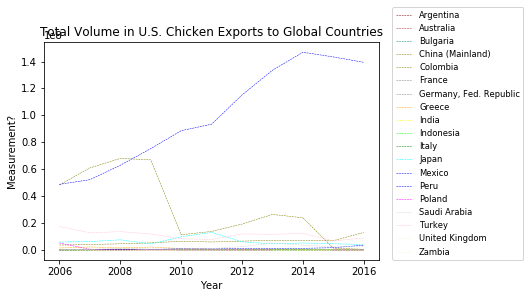

In [105]:
columns = []

for column in summary_chicken_pivot:
        if column == 'Argentina':
            colors='maroon'
        if column == 'Australia':
            colors='brown'
        if column == 'China (Mainland)':
            colors='olive'
        if column =='Bulgaria':
            colors='teal'
        if column=='Columbia':
            colors='navy'
        if column=='France':
            colors='grey'
        if columns=='Germany, Fed. Republic':
            colors='red'
        if column == 'Greece':
            colors='orange'
        if column == 'India':
            colors='yellow'
        if column == 'Indonesia':
            colors='lime'
        if column =='Italy':
            colors='green'
        if column=='Japan':
            colors='cyan'
        if column=='Mexico':
            colors='blue'
        if columns=='Peru':
            colors='purple'
        if column == 'Poland':
            colors='magenta'
        if column == 'Saudi Arabia':
            colors='lightgrey'
        if column =='Turkey':
            colors='pink'
        if column=='United Kingdom':
            colors='beige'
        if column=='United States':
            colors='lightgreen'
        if columns=='Zambia':
            colors='lavender'
            
        x_axis = summary_chicken_pivot.index
        y_axis = summary_chicken_pivot[column]
        
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=colors, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Total Volume in U.S. Chicken Exports to Global Countries")
plt.xlabel("Year")
plt.ylabel("Measurement?")

In [106]:
summary_chicken_pct = summary_chicken_pivot.pct_change()
summary_chicken_pct = summary_chicken_pct.drop(columns=['Argentina','Zambia','Poland'])
summary_chicken_pct

Country,Australia,Bulgaria,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Indonesia,Italy,Japan,Mexico,Peru,Saudi Arabia,Turkey,United Kingdom
Year,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,-0.312971,0.00000,0.261759,0.097344,-0.919214,1.392605,0.542004,2.191414,2.937510,0.482877,0.068014,0.071087,6.254043,0.134719,-0.270661,16.722996
2008,0.260523,-0.59724,0.116201,0.145282,1.382076,1.219374,-0.290437,0.475911,95.075788,2.875843,0.207454,0.205566,-0.645414,1.699415,0.064874,1.522156
2009,0.690783,0.00000,-0.015740,0.147094,0.350538,0.241520,0.352195,-0.854008,-0.584434,-0.086972,-0.409842,0.196136,2.766544,-0.361666,-0.130701,-0.977149
2010,-0.391412,0.00000,-0.831551,0.230759,2.534731,0.091946,-0.496169,1.021095,-0.970552,-0.190711,1.198438,0.177239,3.236290,0.107092,-0.297351,0.337889
2011,1.422331,0.00000,0.218515,-0.085130,5.565672,0.014900,-0.455822,5.418574,1.003258,-0.424047,0.334051,0.054597,-0.195858,0.343854,-0.061887,0.666191
2012,0.492440,0.00000,0.397191,0.106013,-0.755637,0.282685,-0.405348,-0.842512,-0.491667,-0.574157,-0.537358,0.232454,0.095315,1.329024,0.528032,-0.214440
2013,0.102243,0.00000,0.375106,0.095322,-0.959412,-0.290663,-0.424614,-0.849640,0.053470,1.228595,-0.261888,0.159572,0.254406,1.118369,-0.021243,-0.607209
2014,0.202682,0.00000,-0.096098,0.001653,-0.248253,0.007608,-0.598184,3.875870,2.158812,-0.862643,0.165194,0.100208,0.053625,-0.306771,0.053803,0.270689


Text(0, 0.5, 'Percent Change')

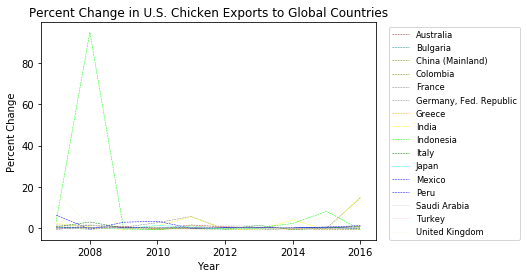

In [107]:
columns = []

for column in summary_chicken_pct:
        if column == 'Argentina':
            colors='maroon'
        if column == 'Australia':
            colors='brown'
        if column == 'China (Mainland)':
            colors='olive'
        if column =='Bulgaria':
            colors='teal'
        if column=='Columbia':
            colors='navy'
        if column=='France':
            colors='grey'
        if columns=='Germany, Fed. Republic':
            colors='red'
        if column == 'Greece':
            colors='orange'
        if column == 'India':
            colors='yellow'
        if column == 'Indonesia':
            colors='lime'
        if column =='Italy':
            colors='green'
        if column=='Japan':
            colors='cyan'
        if column=='Mexico':
            colors='blue'
        if columns=='Peru':
            colors='purple'
        if column == 'Poland':
            colors='magenta'
        if column == 'Saudi Arabia':
            colors='lightgrey'
        if column =='Turkey':
            colors='pink'
        if column=='United Kingdom':
            colors='beige'
        if column=='United States':
            colors='lightgreen'
        if columns=='Zambia':
            colors='lavender'
            
        x_axis = summary_chicken_pct.index
        y_axis = summary_chicken_pct[column]
        
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=colors, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Chicken Exports to Global Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")